<a href="https://colab.research.google.com/github/danjor667/web-scrapping/blob/master/Web_scraping_ALU_PLD_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def scrape_amazon(search_term):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8",
        "Referer": "https://www.amazon.com/"
    }

    url = f"https://www.amazon.com/s?k={search_term.replace(' ', '+')}"

    # Add random delay to mimic human behavior
    time.sleep(random.uniform(1, 3))

    try:
        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f"Failed to retrieve page. Status code: {response.status_code}")
            print("Amazon might be blocking the request. Try again later or use a proxy.")
            return []

        # Check if we got a CAPTCHA page
        if "captcha" in response.text.lower():
            print("CAPTCHA detected. Amazon is blocking the request.")
            return []

        soup = BeautifulSoup(response.content, 'html.parser')

        products = []

        for item in soup.find_all('div', {'data-component-type': 's-search-result'}):
            try:
                title = item.find('span', {'class': 'a-size-medium'})
                if not title:
                    title = item.h2
                title = title.text.strip()

                # More robust link extraction
                link_tag = item.find('a', {'class': 'a-link-normal s-no-outline'})
                link = "https://www.amazon.com" + link_tag['href'] if link_tag else "N/A"

                price_whole = item.find('span', {'class': 'a-price-whole'})
                price_fraction = item.find('span', {'class': 'a-price-fraction'})
                price = f"${price_whole.text}{price_fraction.text}" if price_whole and price_fraction else "N/A"

                products.append({
                    'title': title,
                    'price': price,
                    'link': link
                })
            except AttributeError:
                continue

        return products

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return []

In [ ]:
# Define the Function to Save Data to CSV
def save_to_csv(products, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'price', 'link'])
        writer.writeheader()
        writer.writerows(products)

In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: coding book
Scraped 48 products. Data saved to amazon_products.csv


# **Trying to search other items**

In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: shoes
Scraped 48 products. Data saved to amazon_products.csv


In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: iphone
Scraped 16 products. Data saved to amazon_products.csv


In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: plate
Scraped 48 products. Data saved to amazon_products.csv


In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: dress
Scraped 48 products. Data saved to amazon_products.csv


In [ ]:
# Execute the Scraper
if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    save_to_csv(products, 'amazon_products.csv')
    print(f"Scraped {len(products)} products. Data saved to amazon_products.csv")

Enter product to search: Television
Scraped 16 products. Data saved to amazon_products.csv


## **Analysis**

In [ ]:
# Load CSV file
df = pd.read_csv("amazon_products.csv")

# Display first few rows
df.head(10)

,title,price,link
0,VIZIO 40-inch Full HD 1080p Smart TV with DTS ...,$138.00,https://www.amazon.com/VIZIO-40-inch-1080p-Vir...
1,INSIGNIA 32-inch Class F20 Series Smart HD 720...,$89.99,https://www.amazon.com/insignia-fire-tv-32-inc...
2,SAMSUNG 65-Inch Class Crystal UHD 4K DU7200 Se...,NaN,https://www.amazon.com/SAMSUNG-Tracking-Xceler...
3,INSIGNIA 43-inch Class F30 Series LED 4K UHD S...,$159.99,https://www.amazon.com/insignia-fire-tv-43-inc...
4,INSIGNIA 50-inch Class F30 Series LED 4K UHD S...,$209.99,https://www.amazon.com/insignia-fire-tv-50-inc...
5,TCL 55-Inch Class S5 UHD 4K LED Smart TV with ...,$249.99,https://www.amazon.com/tcl-fire-tv-55-inch-cla...
6,"Amazon Fire TV 32"" 2-Series (newest model), HD...",$129.99,https://www.amazon.com/amazon-fire-tv-32-inch-...
7,TCL 65-Inch Q65 QLED 4K UHD Smart TV with Goog...,$368.00,https://www.amazon.com/TCL-65Q651G-Accelerator...
8,Roku Smart TV – 50-Inch Select Series 4K HDR R...,$248.00,https://www.amazon.com/Roku-Brilliant-Automati...
9,INSIGNIA 70-inch Class F50 Series LED 4K UHD S...,$379.99,https://www.amazon.com/insignia-fire-tv-70-inc...


In [ ]:
# Function to clean price values
def clean_price(price):
    try:
        return float(price.replace("$", "").replace(",", ""))
    except:
        return None  # Handle missing or incorrect values

# Apply cleaning function to price column
df["price"] = df["price"].apply(clean_price)

# Drop rows with missing prices
df = df.dropna(subset=["price"])

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   15 non-null     object 
 1   price   15 non-null     float64
 2   link    15 non-null     object 
dtypes: float64(1), object(2)
memory usage: 480.0+ bytes


In [ ]:
# For Price Analysis

# Basic statistics
print("Average Price: $", round(df["price"].mean(), 2))
print("Minimum Price: $", df["price"].min())
print("Maximum Price: $", df["price"].max())

# Most expensive & cheapest product
most_expensive = df[df["price"] == df["price"].max()]
cheapest = df[df["price"] == df["price"].min()]

print("\nMost Expensive Product:\n", most_expensive)
print("\nCheapest Product:\n", cheapest)

Average Price: $ 261.83
Minimum Price: $ 89.99
Maximum Price: $ 449.99

Most Expensive Product:
                                                 title   price  \
13  Amazon Fire TV 50" 4-Series, 4K UHD smart TV w...  449.99   

                                                 link  
13  https://www.amazon.com/amazon-fire-tv-50-inch-...  

Cheapest Product:
                                                title  price  \
1  INSIGNIA 32-inch Class F20 Series Smart HD 720...  89.99   

                                                link  
1  https://www.amazon.com/insignia-fire-tv-32-inc...  


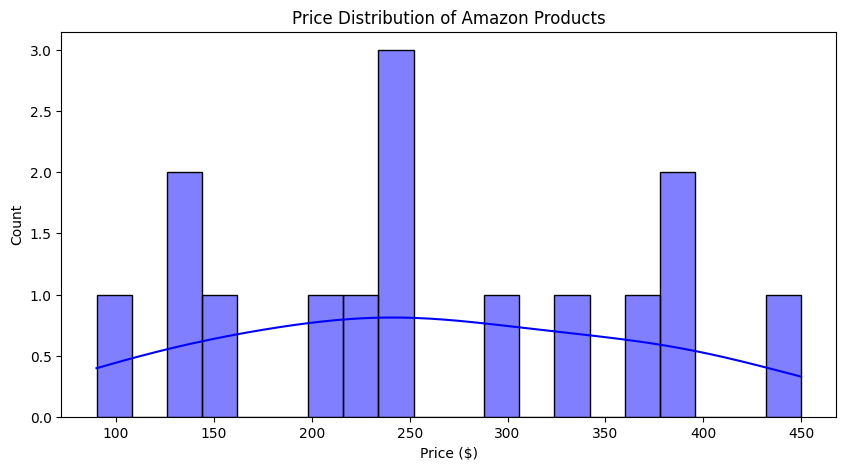

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=20, kde=True, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Price Distribution of Amazon Products")
plt.show()

In [ ]:
# Check for Top 5 Most Expensive Products
df.sort_values(by="price", ascending=False).head(5)

,title,price,link
13,"Amazon Fire TV 50"" 4-Series, 4K UHD smart TV w...",449.99,https://www.amazon.com/amazon-fire-tv-50-inch-...
11,SAMSUNG 50-Inch Class 4K Crystal UHD DU8000 Se...,393.60,https://www.amazon.com/SAMSUNG-50-Inch-Trackin...
9,INSIGNIA 70-inch Class F50 Series LED 4K UHD S...,379.99,https://www.amazon.com/insignia-fire-tv-70-inc...
7,TCL 65-Inch Q65 QLED 4K UHD Smart TV with Goog...,368.00,https://www.amazon.com/TCL-65Q651G-Accelerator...
14,LG 55-Inch Class UT75 Series LED Smart TV 4K P...,329.99,https://www.amazon.com/LG-55-Inch-Processor-AI...


# **To do analysis for a particular product in the CSV**
The analysis above is for the last set of products (plate) scraped from Amazon, now let's check for others (shoes, coding book, etc)

In [ ]:
def analyze_products(products):
    if not products:
        print("No products to analyze.")
        return

    # Convert prices to float for analysis
    price_list = []
    for product in products:
        if product['price'] != 'N/A':
            price = float(product['price'].replace('$', '').replace(',', ''))
            price_list.append(price)

    if not price_list:
        print("No valid prices found for analysis.")
        return

    # Basic analysis
    min_price = min(price_list)
    max_price = max(price_list)
    avg_price = sum(price_list) / len(price_list)

    print("\n=== Product Analysis ===")
    print(f"Total products: {len(products)}")
    print(f"Minimum price: ${min_price:.2f}")
    print(f"Maximum price: ${max_price:.2f}")
    print(f"Average price: ${avg_price:.2f}")

    # Find most expensive product
    most_expensive = max(products, key=lambda x: float(x['price'].replace('$', '').replace(',', '')) if x['price'] != 'N/A' else 0)
    print("\nMost expensive product:")
    print(f"Title: {most_expensive['title']}")
    print(f"Price: {most_expensive['price']}")
    print(f"Link: {most_expensive['link']}")

    # Price distribution
    print("\nPrice distribution:")
    price_ranges = {
        'Under $50': 0,
        '$50 - $100': 0,
        '$100 - $200': 0,
        'Over $200': 0
    }

    for price in price_list:
        if price < 50:
            price_ranges['Under $50'] += 1
        elif 50 <= price < 100:
            price_ranges['$50 - $100'] += 1
        elif 100 <= price < 200:
            price_ranges['$100 - $200'] += 1
        else:
            price_ranges['Over $200'] += 1

    for range_, count in price_ranges.items():
        print(f"{range}: {count} products")

if __name__ == "__main__":
    search_term = input("Enter product to search: ")
    products = scrape_amazon(search_term)
    analyze_products(products)

Enter product to search: iphone

=== Product Analysis ===
Total products: 16
Minimum price: $128.00
Maximum price: $721.72
Average price: $345.95

Most expensive product:
Title: Apple iPhone 16 Plus, US Version, 128GB, Pink - Unlocked (Renewed)
Price: $721.72
Link: https://www.amazon.com/Apple-iPhone-Plus-Version-128GB/dp/B0DHJ86J4R/ref=sr_1_11?dib=eyJ2IjoiMSJ9.7qMkqRkGH47sDHbUVr3ACDQT75NH6Zbc3rzJ9weYh0e8dnN9gxrQ8Qx_XKH3vZleO1xdSbRhVzJ_NCyKrwm78UsmThkCWJbtMFmRPTsH2P08W3YJHE3W9ff6bo1pKsz-FT9L3tuhJbXg68V51QyntrVpSbx-y4chdRfefwwEFWWMZpThcuD01UUhYXwyY_Hc5xOxoe7c9yQdFlqbLYq8Gf7gtd-2uP6PHgYEzKtHODI.fqNBYphyTzFWNanLD_YJsh4S5kRCkrYzdEep7f4M6IM&dib_tag=se&keywords=iphone&qid=1740517750&sr=8-11

Price distribution:
<class 'range'>: 0 products
<class 'range'>: 0 products
<class 'range'>: 5 products
<class 'range'>: 11 products
